In [1]:
import numpy as np
import pickle
import functions as fun
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

In [2]:
# Load model
pickle_in = open(".\..\models\XGB\MEPS_xgb_model_final_v2.pickle", "rb")
reg_xgb = pickle.load(pickle_in)

In [3]:
# Read data
path = ".\..\data\MEPS_data_preprocessed"
X_train, y_train = fun.read_x_y(path + "_train.csv", "HEALTHEXP")
X_test, y_test = fun.read_x_y(path + "_test.csv", "HEALTHEXP")

In [4]:
# Predict
y_pred_train = reg_xgb.predict(X_train)
y_pred_test = reg_xgb.predict(X_test)

In [5]:
# Check results
fun.print_model_results(y_train, y_pred_train, y_test, y_pred_test)

Training: 
RMSE:  2.0396133775061136  | MAE:  1.5089425596799377  | R^2:  0.45441720670280983 

Test: 
RMSE:  2.1726948936538393  | MAE:  1.6063163992325256  | R^2:  0.3727759752430847 



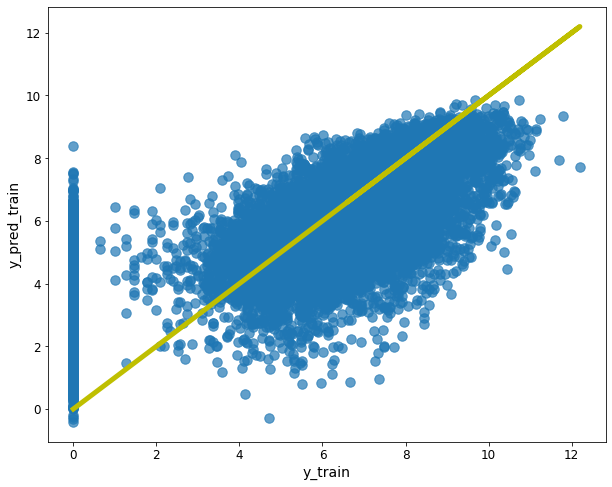

In [6]:
# Plot train predictions
fun.plot_target_pred("y_train", y_train, "y_pred_train", y_pred_train, "06-xgb_")

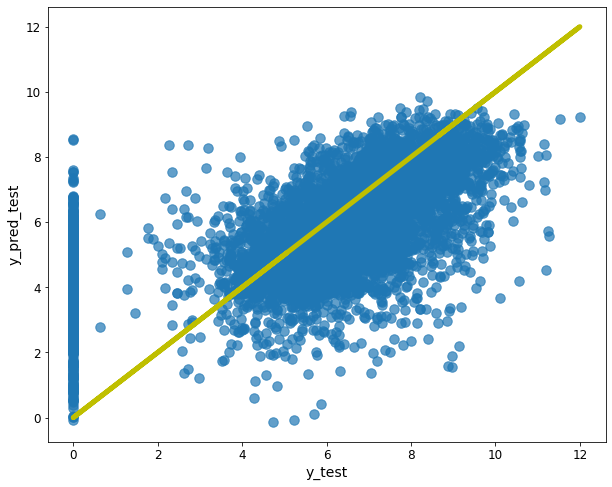

In [7]:
# Plot test predictions
fun.plot_target_pred("y_test", y_test, "y_pred_test", y_pred_test, "06-xgb_")

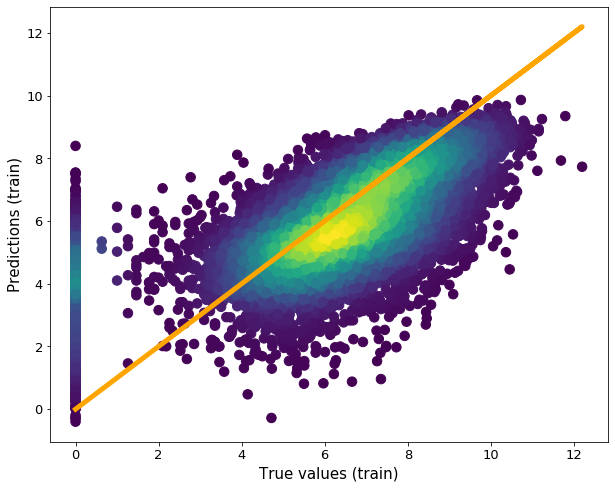

In [16]:
xy = np.vstack([y_train, y_pred_train])
z = gaussian_kde(xy)(xy)

plt.figure(figsize = (10, 8))
plt.scatter(y_train, y_pred_train, c = z, s = 90)
plt.plot(y_train, y_train, c = "orange", lw = 5)
plt.xlabel("True values (train)", size = 15)
plt.ylabel("Predictions (train)", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig("images/06-xgb_train_v2.png")
plt.savefig("images/06-xgb_train_v2.svg")
plt.show()

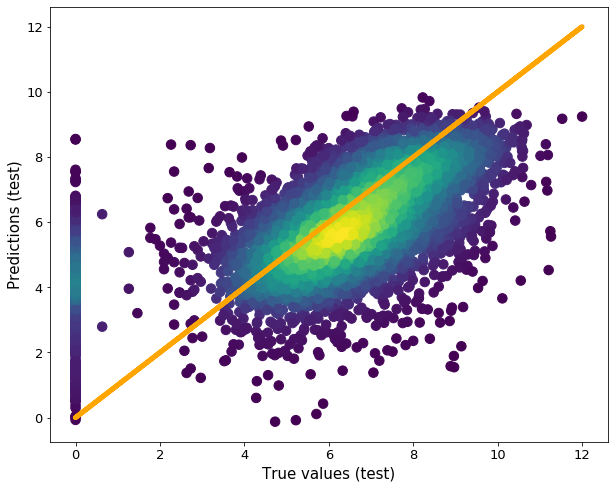

In [17]:
xy = np.vstack([y_test, y_pred_test])
z = gaussian_kde(xy)(xy)

plt.figure(figsize = (10, 8))
plt.scatter(y_test, y_pred_test, c = z, s = 90)
plt.plot(y_test, y_test, c = "orange", lw = 5)
plt.xlabel("True values (test)", size = 15)
plt.ylabel("Predictions (test)", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.savefig("images/06-xgb_test_v2.png")
plt.savefig("images/06-xgb_test_v2.svg")
plt.show()

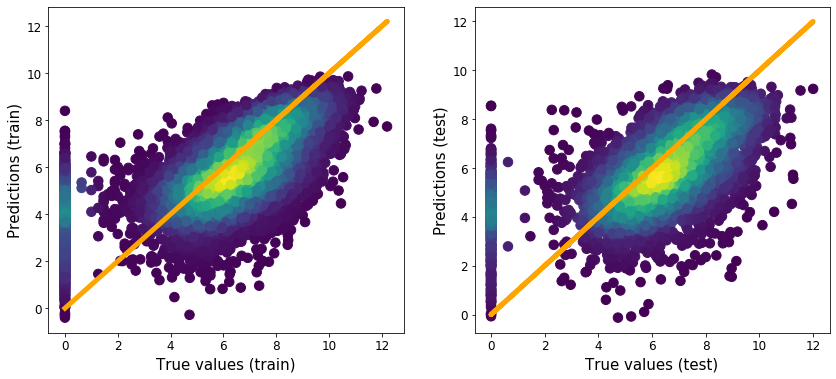

In [17]:
fig = plt.figure(figsize = (14, 6))


# Train
ax = fig.add_subplot(1, 2, 1)
xy = np.vstack([y_train, y_pred_train])
z = gaussian_kde(xy)(xy)
ax.scatter(y_train, y_pred_train, c = z, s = 90)
ax.plot(y_train, y_train, c = "orange", lw = 5)
ax.set_xlabel("True values (train)", size = 15)
ax.set_ylabel("Predictions (train)", size = 15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 


# Test
ax = fig.add_subplot(1, 2, 2)
xy = np.vstack([y_test, y_pred_test])
z = gaussian_kde(xy)(xy)
ax.scatter(y_test, y_pred_test, c = z, s = 90)
ax.plot(y_test, y_test, c = "orange", lw = 5)
ax.set_xlabel("True values (test)", size = 15)
ax.set_ylabel("Predictions (test)", size = 15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 


fig.savefig("images/06-xgb_scatter_train_test.png")
plt.show()